In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

In [3]:
df = pd.read_csv("titanic_train.csv")

In [4]:
print(df.shape)

(891, 12)


In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
value_counts = {}
for column in df.columns:
  value_counts[column] = df[column].value_counts()
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
df=df.drop('Cabin',axis=1)

In [12]:
most_frequent_port = df['Embarked'].mode()[0]
df['Embarked'].fillna(most_frequent_port, inplace=True)

In [13]:
mean_value=df['Age'].mean()
print(mean_value)

29.69911764705882


In [14]:
df['Age'].fillna(mean_value,inplace=True)

In [15]:
df.duplicated(subset='PassengerId').sum()

0

In [16]:
numerical_columns = ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
plt.style.use('ggplot')
custom_palette = sns.color_palette("Blues_d")
sns.set_palette(custom_palette)
def outlier_plot_box(df, column_name,ax=None):
    sns.boxplot(x=df[column_name], ax=ax)


def remove_outliers(df1, cols, threshold=3):
    for col in cols:
        z_scores = np.abs(stats.zscore(df[col]))
        df1 = df1[(z_scores < threshold)]
    return df1


def plot_outliers_before_and_after(df, numerical_columns, threshold=3):
    fig, axes = plt.subplots(len(numerical_columns), 2, figsize=(10, len(numerical_columns) * 6))

    for i, column in enumerate(numerical_columns):
        ax1 = axes[i][0]
        ax2 = axes[i][1]

        outlier_plot_box(df, column, ax=ax1)
        ax1.set_title(f"{column} Distribution (Before)")

       
        df_cleaned = remove_outliers(df, [column], threshold=threshold)

       
        outlier_plot_box(df_cleaned, column, ax=ax2)
        ax2.set_title(f"{column} Distribution (After)")

    plt.tight_layout()
    plt.show()

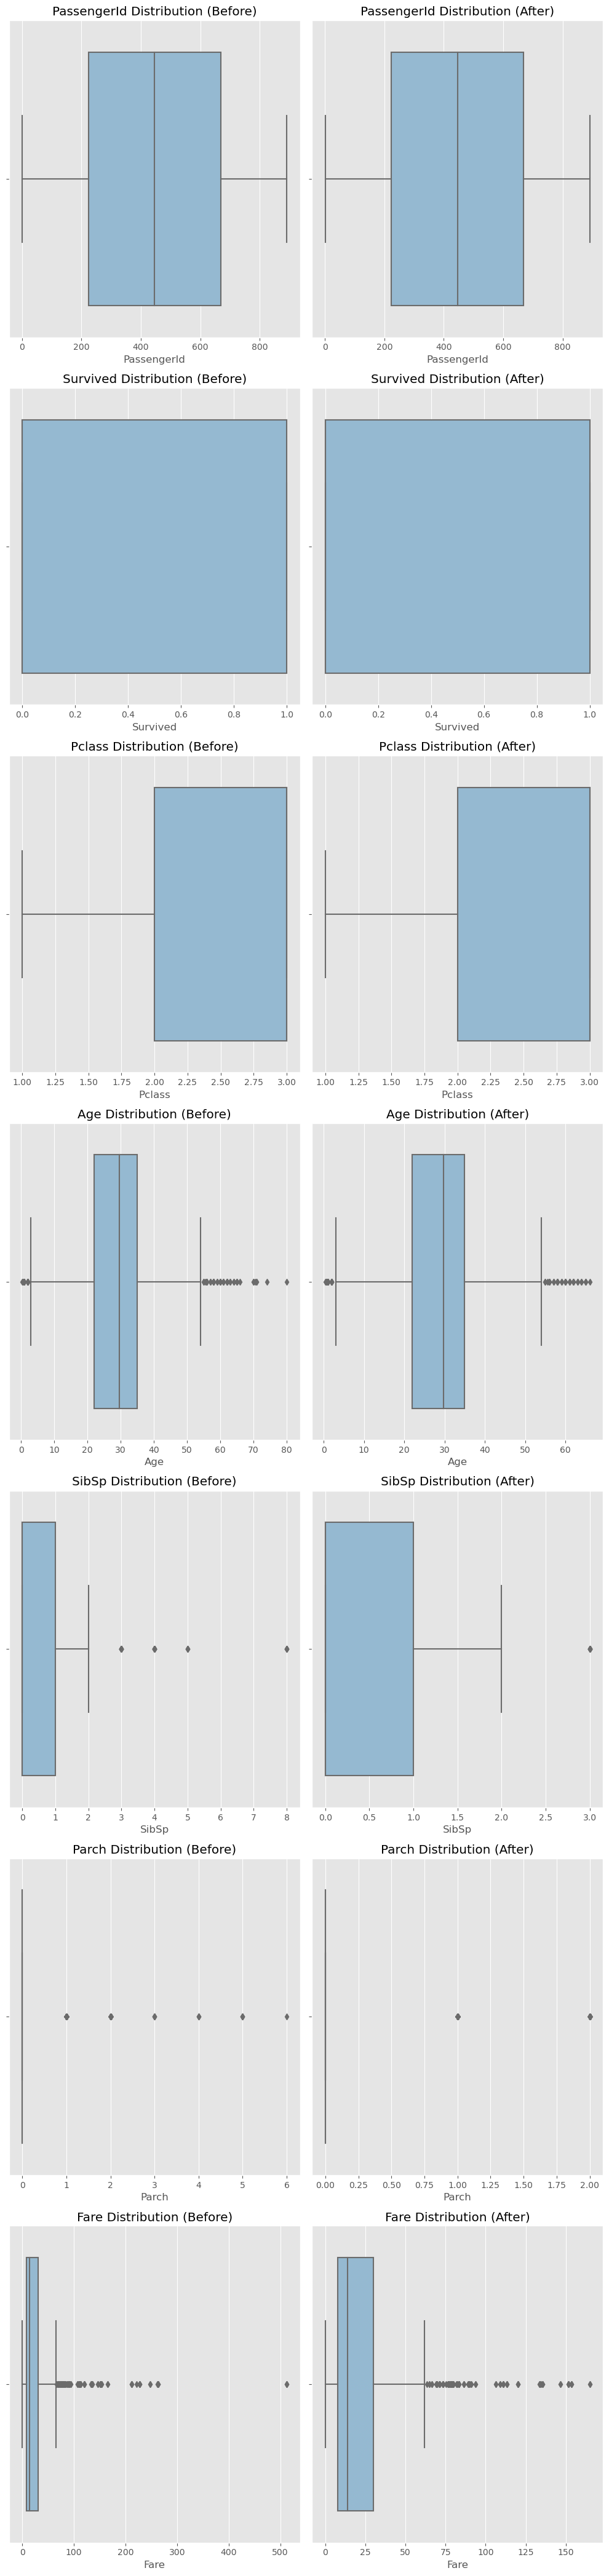

In [17]:
plot_outliers_before_and_after(df, numerical_columns)

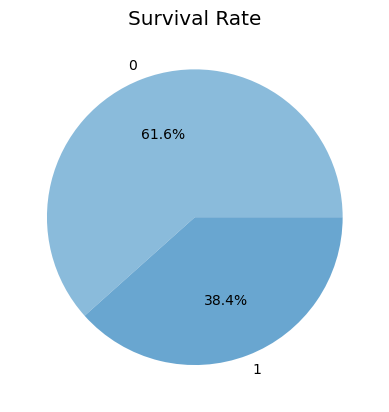

<Figure size 1200x900 with 0 Axes>

In [18]:
def plot_survival_rate(df):
    
    fig, ax = plt.subplots()


    ax.pie(df['Survived'].value_counts(), labels=df['Survived'].value_counts().index, autopct='%1.1f%%')

    
    ax.set_title('Survival Rate')

    plt.figure(figsize=(12,9))
    plt.show()
plot_survival_rate(df)

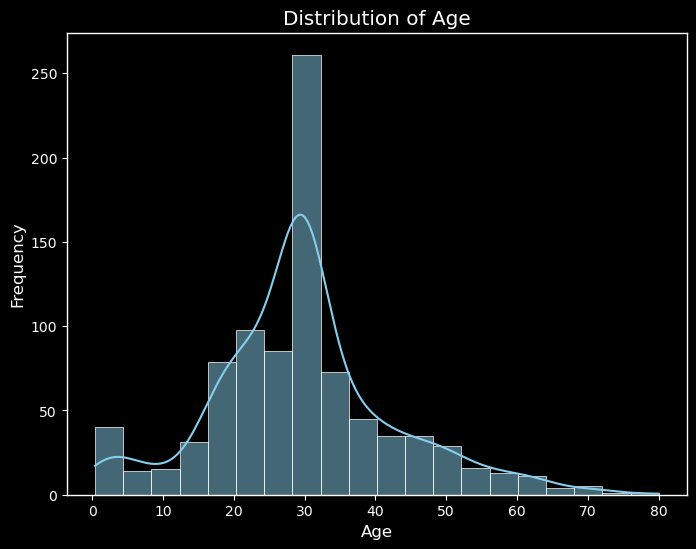

In [19]:
# Histogram for Age
plt.style.use('dark_background')
plt.figure(figsize=(8, 6))
ax=sns.histplot(data=df, x='Age', bins=20, kde=True, color='skyblue')
ax.grid(False)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

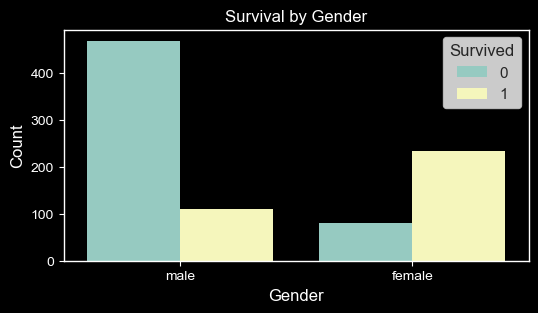

In [21]:
plt.figure(figsize=(6, 3))
ax=sns.countplot(data=df, x="Sex", hue="Survived")
ax.grid(False)
sns.set(style='whitegrid')
plt.title("Survival by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Survived", loc="upper right")
plt.show()

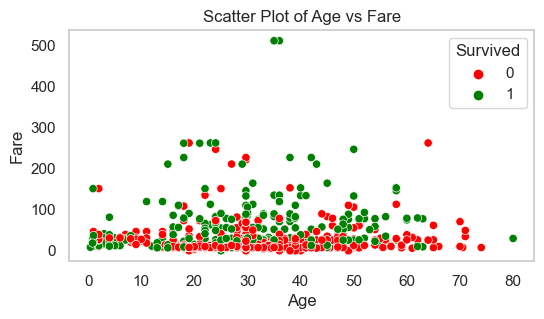

In [22]:
plt.figure(figsize=(6, 3))
custom_palette = {0: 'red', 1: 'green'}
plt.style.use('ggplot')
sns.set(style="whitegrid")
ax=sns.scatterplot(data=df, x="Age", y="Fare",hue="Survived",palette=custom_palette)
ax.grid(False)
plt.title("Scatter Plot of Age vs Fare")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.legend(title="Survived")
plt.show()